In [19]:
#Load required libraries
import pandas as pd
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.datasets import make_moons
from matplotlib import pyplot as plt

In [20]:
# Generate 2d classification dataset
a, b = make_moons(n_samples=100, noise=0.1)
df = pd.DataFrame(dict(f1=a[:,0], f2=a[:,1], label=b))
df.head()

,f1,f2,label
0,0.067040,0.858971,0
1,1.847807,0.393321,1
2,1.725232,-0.308692,1
3,0.207784,0.052559,1
4,0.465268,-0.326238,1


In [21]:
#Feature selection
X = df.iloc[:,0:2]  #Features
y = df.label        #Class/output variable

In [22]:
#Splitting dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)
X_test.head()

,f1,f2
40,1.102470,-0.086205
67,0.445816,0.904878
14,0.929419,0.357940
25,-0.927190,0.377171
98,0.355018,0.918855


In [23]:
#Building Linear SVM model
clf = svm.SVC(kernel='linear') # Linear Kernel
clf = clf.fit(X_train,y_train)
clf

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [24]:
y_pred = clf.predict(X_test)

In [25]:
#Evaluate your model
print("Accuracy = ", metrics.accuracy_score(y_test,y_pred))

Accuracy =  0.8


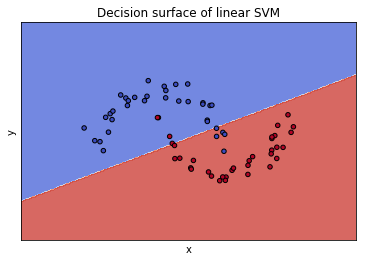

In [26]:
#To visualize the generated decision boundary
import numpy as np

def make_meshgrid(x, y, h=0.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out


fig, ax = plt.subplots()

# title for the plots
title = ('Decision surface of linear SVM')

# Set-up grid for plotting.
X0 = X_train.iloc[:, 0]
X1 = X_train.iloc[:, 1]

xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y_train, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_ylabel('y')
ax.set_xlabel('x')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
plt.show()